In [12]:
# Loading the libraries
library(ggplot2)
library(dplyr)
library(caret)
library(caTools)
library(tidyverse)
library(pROC)

In [2]:
df <-  read.csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
head(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [3]:
# seeing the structure of data
str(df)

# checking for NA's in the dataset
table(is.na(df))

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...



FALSE 
 3887 

In [4]:
# replacing numerical data as factors to perform Logistic Regression
df$anaemia <- factor(df$anaemia)
df$diabetes <- factor(df$diabetes)
df$high_blood_pressure <- factor(df$high_blood_pressure)
df$sex <- factor(df$sex)
df$smoking <- factor(df$smoking)
df$DEATH_EVENT <- factor(df$DEATH_EVENT)

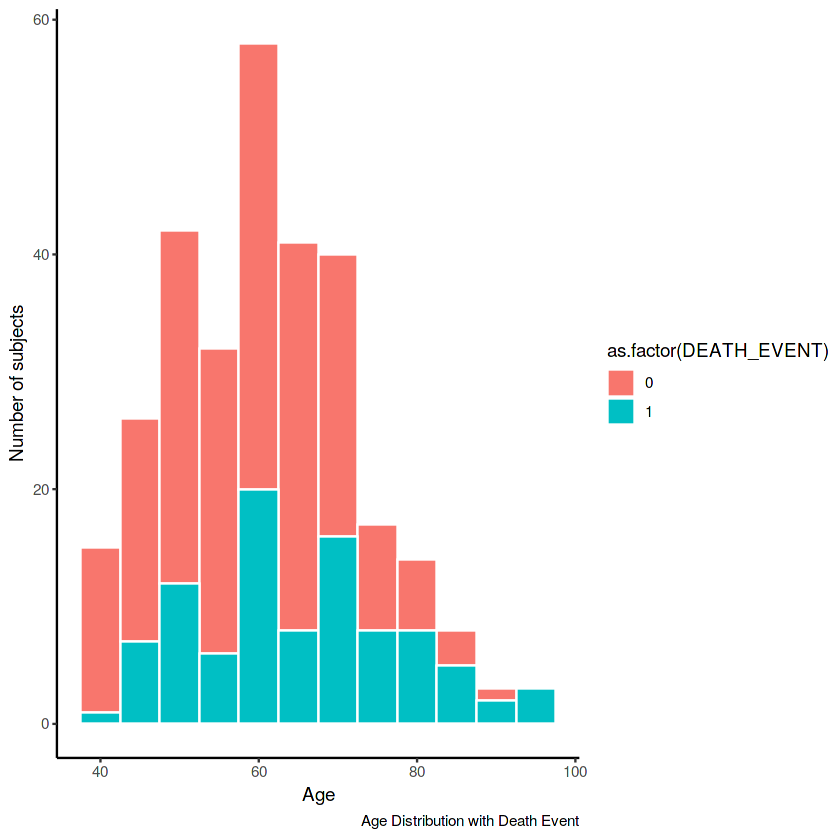

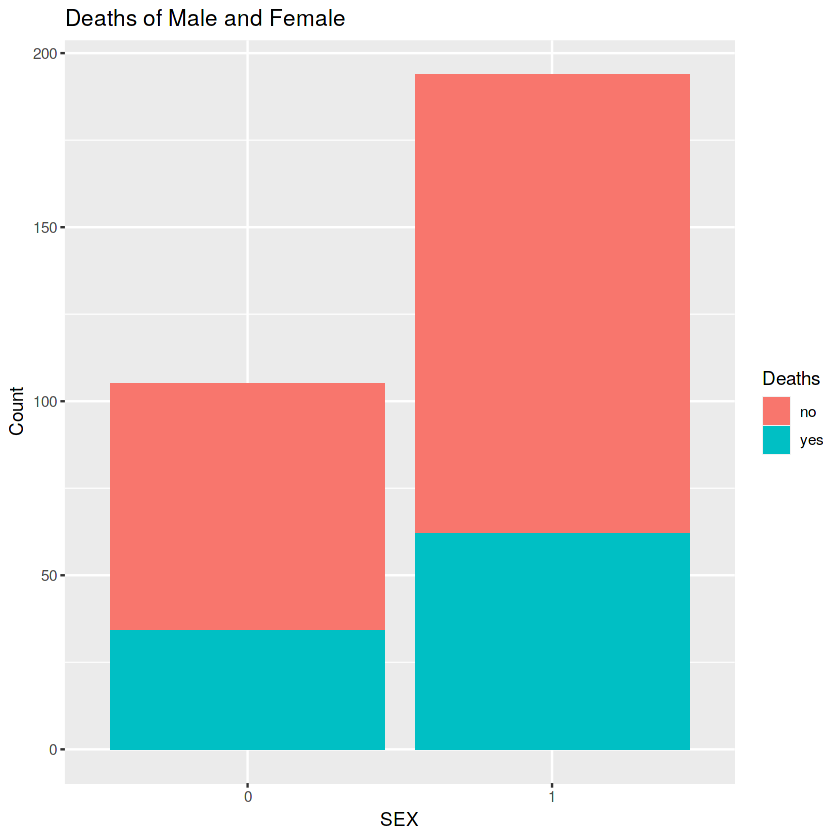

In [6]:
# Visulization
ggplot(df, aes(x=age,fill=as.factor(DEATH_EVENT))) + 
    geom_histogram(binwidth = 5,color = "white") + 
    xlab("Age") + ylab("Number of subjects") + theme_classic() + 
    labs(caption = "Age Distribution with Death Event")

ggplot(df, aes(x=sex, fill= DEATH_EVENT)) + 
    geom_bar() +
    xlab("SEX") +
    ylab("Count") +
    ggtitle("Deaths of Male and Female") +
    scale_fill_discrete(name = "Deaths", labels = c("no", "yes"))

In [8]:
set.seed(123)
split <- sample.split(Y = df$DEATH_EVENT, SplitRatio = 0.75)
train <- subset(x = df, split == T)
test <- subset(x = df, split == F)


# Building a model
model <- glm(DEATH_EVENT~.,data = train,family = "binomial")
summary(model)



Call:
glm(formula = DEATH_EVENT ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1439  -0.5650  -0.2193   0.4678   2.4782  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.514e+01  6.462e+00   2.343 0.019144 *  
age                       3.125e-02  1.859e-02   1.681 0.092700 .  
anaemia1                 -2.023e-01  4.193e-01  -0.483 0.629390    
creatinine_phosphokinase  2.285e-04  2.680e-04   0.853 0.393760    
diabetes1                -5.689e-02  4.028e-01  -0.141 0.887695    
ejection_fraction        -7.962e-02  1.969e-02  -4.044 5.25e-05 ***
high_blood_pressure1     -1.088e-01  4.172e-01  -0.261 0.794180    
platelets                -2.290e-06  2.606e-06  -0.879 0.379436    
serum_creatinine          6.232e-01  1.877e-01   3.319 0.000903 ***
serum_sodium             -9.152e-02  4.495e-02  -2.036 0.041722 *  
sex1                     -5.453e-01  4.852e-01  -1

0 vs. 1,0.7720588


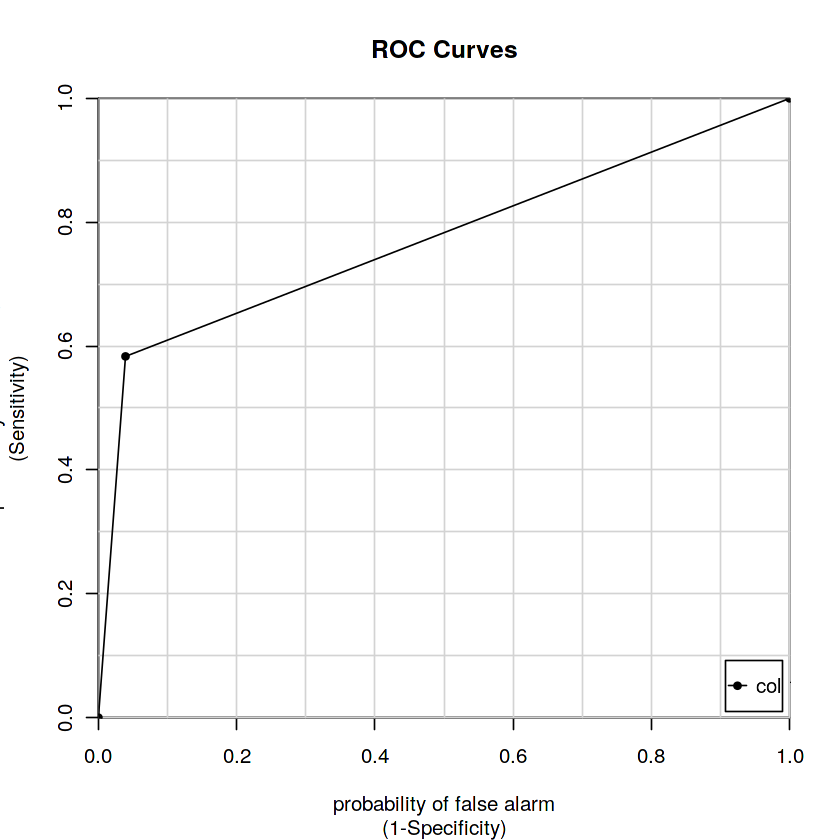

In [9]:
test$prob <- predict(object = model, newdata = test, type ='response')
test$death_pred <- ifelse(test$prob >= 0.5, 1, 0)
colAUC(test$death_pred,test$DEATH_EVENT,plotROC=T)

Confusion Matrix and Statistics

   
     0  1
  0 49  2
  1 10 14
                                          
               Accuracy : 0.84            
                 95% CI : (0.7372, 0.9145)
    No Information Rate : 0.7867          
    P-Value [Acc > NIR] : 0.16190         
                                          
                  Kappa : 0.5968          
                                          
 Mcnemar's Test P-Value : 0.04331         
                                          
            Sensitivity : 0.8305          
            Specificity : 0.8750          
         Pos Pred Value : 0.9608          
         Neg Pred Value : 0.5833          
             Prevalence : 0.7867          
         Detection Rate : 0.6533          
   Detection Prevalence : 0.6800          
      Balanced Accuracy : 0.8528          
                                          
       'Positive' Class : 0               
                                          

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


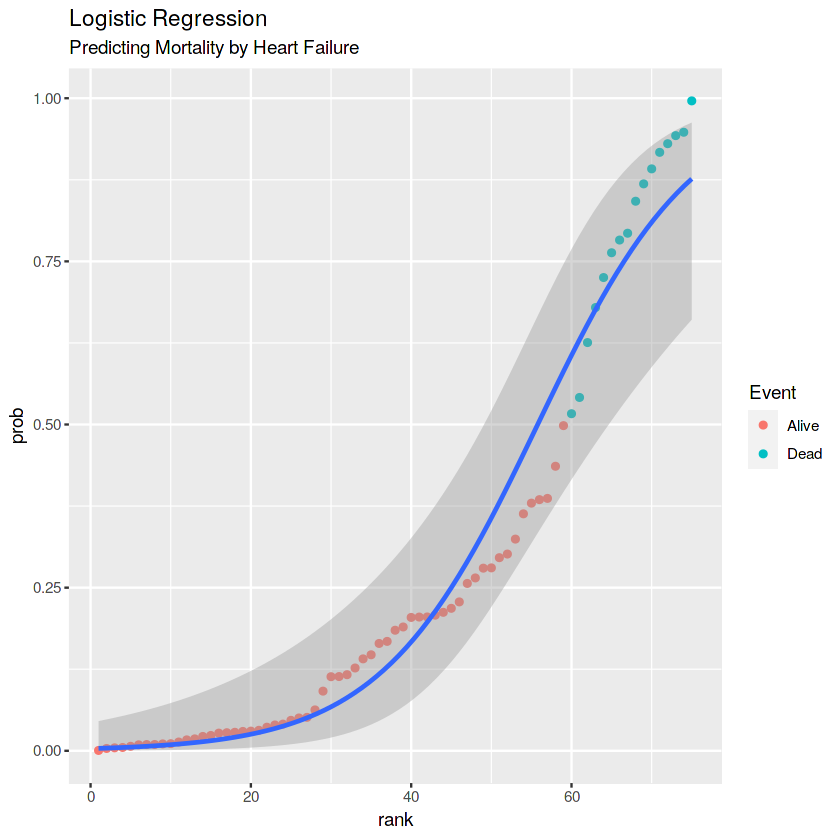

In [11]:
confusionMatrix(table(test$DEATH_EVENT,test$death_pred))
test %>% 
    arrange(prob) %>% 
    mutate(rank = rank(prob), Event = ifelse(prob >= 0.5, 'Dead', 'Alive')) %>% 
    ggplot(aes(rank, prob)) +
    geom_point(aes(color = Event)) +
    geom_smooth(method = "glm", method.args = list(family = "binomial")) +
    ggtitle('Logistic Regression',
            subtitle='Predicting Mortality by Heart Failure') 
    